19:26:31 - cmdstanpy - INFO - Chain [1] start processing
19:26:31 - cmdstanpy - INFO - Chain [1] done processing
/mnt/md0/persuade_home/miniconda3/envs/cp/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/mnt/md0/persuade_home/miniconda3/envs/cp/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
19:26:33 - cmdstanpy - INFO - Chain [1] start processing
19:26:34 - cmdstanpy - INFO - Chain [1] done processing
/

KeyboardInterrupt: 

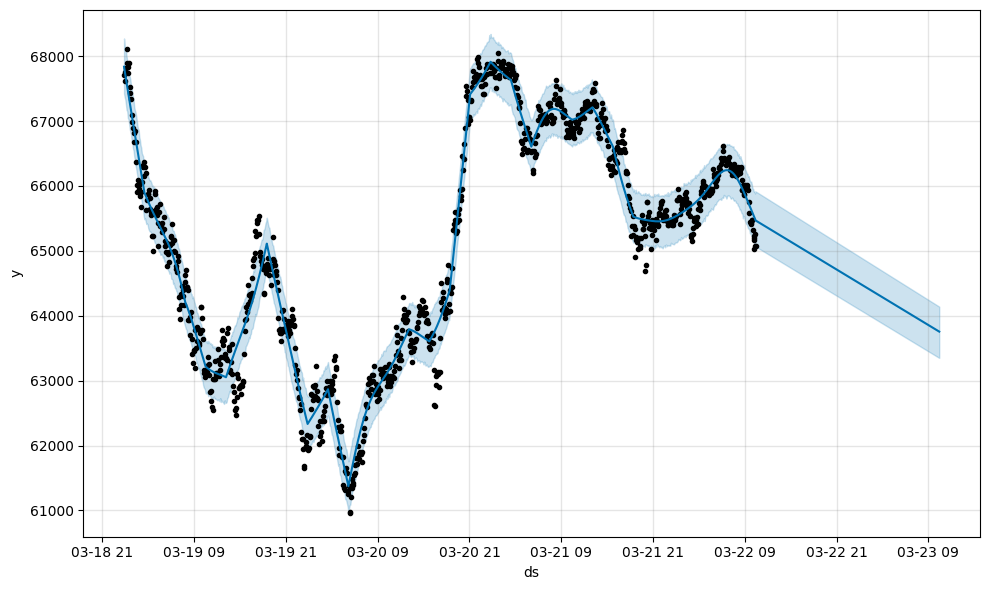

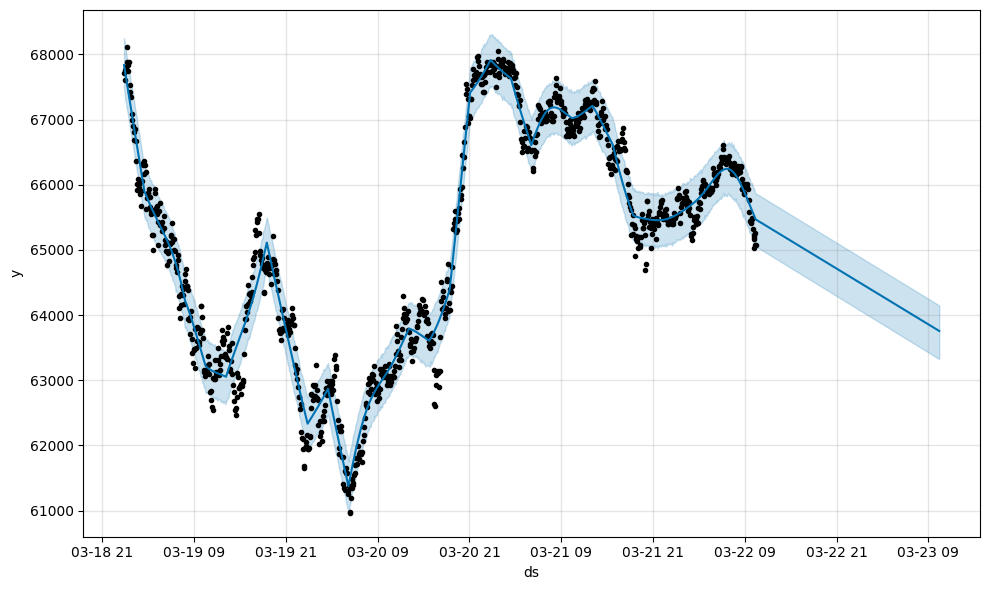

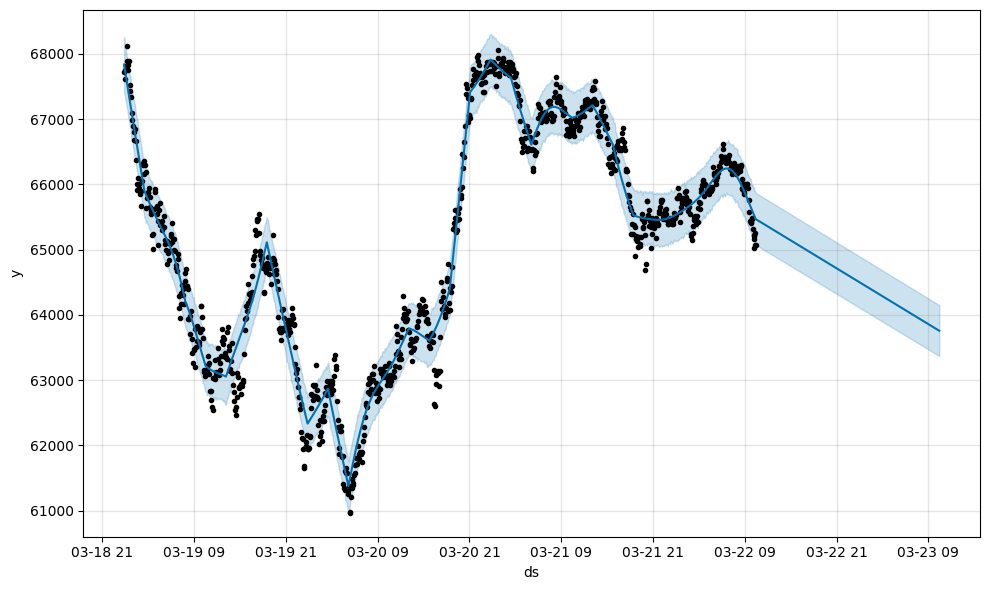

In [3]:
import pandas as pd
from data import get_data
from prophet import Prophet

while True:
    data = get_data()

    df = data['BTC/USDT']['5m']
    df = df.tail(1000)

    df = df.reset_index() # Make sure that the timestamp is not an index anymore
    df.columns = ['ds', 'y1', 'y2', 'y3', 'y', 'y4'] # Renaming columns as required by Prophet
    df = df[['ds', 'y']] # Select only required columns
    df['ds'] = pd.to_datetime(df['ds'] / 1000, unit='s')

    m = Prophet()
    m.fit(df)

    future = m.make_future_dataframe(periods=1)
    forecast = m.predict(future)
    fig1 = m.plot(forecast)

    plt.savefig('forecast.png')